In [1]:
from datetime import datetime
from repetition import pp
from repetition import LearningTracker

# create a learning tracker
lt = LearningTracker(
    epoch=datetime.now(),
)
print("Scheduled as dates")
pp(lt.schedule())
hdl, _ = lt.reference.plot_graph()
hdl.ppd.plot.savefig("quickstart_reference.svg")
hdl.ppd.plot.savefig("quickstart_reference.pdf")
#hdl.save_fig("results/quickstart_reference.svg")

Scheduled as dates
[ datetime.datetime(2018, 12, 31, 8, 0, 53, 963722),
  datetime.datetime(2018, 12, 31, 19, 1, 46, 748736),
  datetime.datetime(2019, 1, 1, 5, 30, 1, 561894),
  datetime.datetime(2019, 1, 1, 16, 35, 12, 771435),
  datetime.datetime(2019, 1, 2, 5, 10, 0, 47607),
  datetime.datetime(2019, 1, 2, 20, 26, 33, 876648),
  datetime.datetime(2019, 1, 3, 16, 39, 57, 258354),
  datetime.datetime(2019, 1, 4, 23, 16, 12, 981081),
  datetime.datetime(2019, 1, 7, 10, 52, 7, 654439),
  datetime.datetime(2019, 1, 16, 10, 58, 1, 234872)]


Scheduled as dates
[ datetime.datetime(2019, 1, 1, 3, 12, 53, 957146),
  datetime.datetime(2019, 1, 1, 14, 39, 2, 33418),
  datetime.datetime(2019, 1, 2, 2, 59, 23, 211442),
  datetime.datetime(2019, 1, 2, 17, 39, 2, 642704),
  datetime.datetime(2019, 1, 3, 12, 55, 20, 577479),
  datetime.datetime(2019, 1, 4, 18, 15, 47, 936098),
  datetime.datetime(2019, 1, 7, 5, 4, 3, 939046),
  datetime.datetime(2019, 1, 17, 1, 27, 42, 217514),
  datetime.datetime(2018, 12, 31, 15, 6, 32, 381060),
  datetime.datetime(2019, 1, 1, 2, 32, 40, 457332),
  datetime.datetime(2019, 1, 1, 14, 53, 1, 635356),
  datetime.datetime(2019, 1, 2, 5, 32, 41, 66618),
  datetime.datetime(2019, 1, 3, 0, 48, 59, 1393),
  datetime.datetime(2019, 1, 4, 6, 9, 26, 360012),
  datetime.datetime(2019, 1, 6, 16, 57, 42, 362960),
  datetime.datetime(2019, 1, 16, 13, 21, 20, 641428)]


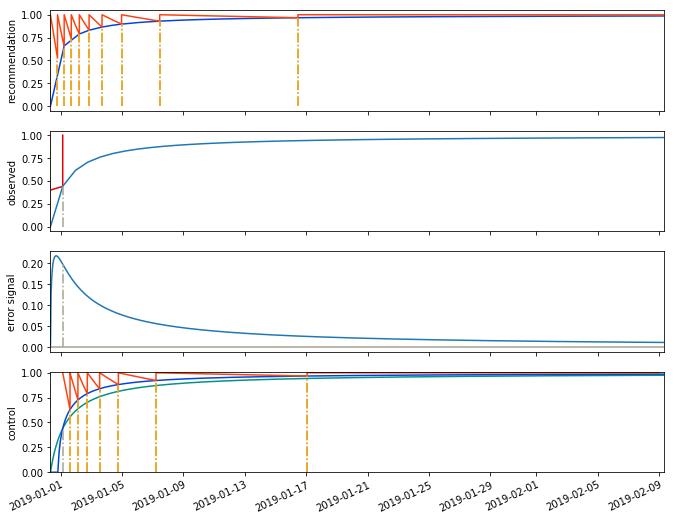

In [2]:
days_since_training_epoch = 0.0
lt.learned(result=0.40, when=days_since_training_epoch)
days_since_training_epoch = 0.8
lt.learned(result=0.44, when=days_since_training_epoch)
print("Scheduled as dates")
pp(lt.schedule())
hdl, _ = lt.plot_graphs()

lt.save_figure("quickstart_control_after_two_events.png")
lt.save_figure("quickstart_control_after_two_events.pdf")


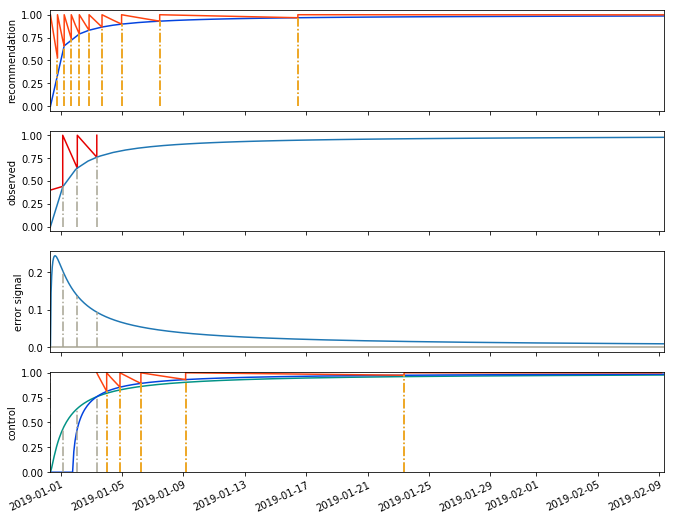

In [3]:
# students tests themselves 1.75 days after they start training
# they recall about 64 percent of the thing they are studying
days_since_training_epoch = 1.75
lt.learned(result=0.64, when=days_since_training_epoch)
# the student reviews their material until 
# they have a perfect recollection

# students tests themselves 3.02 days after they start training
# they recall about 76 percent of the thing they are studying
days_since_training_epoch = 3.02
lt.learned(result=0.76, when=days_since_training_epoch)
# the student reviews their material until 
# they have a perfect recollection
lt.plot_graphs()
lt.save_figure("quickstart_control_after_four_events.png")
lt.save_figure("quickstart_control_after_four_events.pdf")

[datetime.datetime(2019, 1, 29, 8, 0, 53, 957146), datetime.datetime(2019, 1, 27, 21, 52, 31, 22060)]


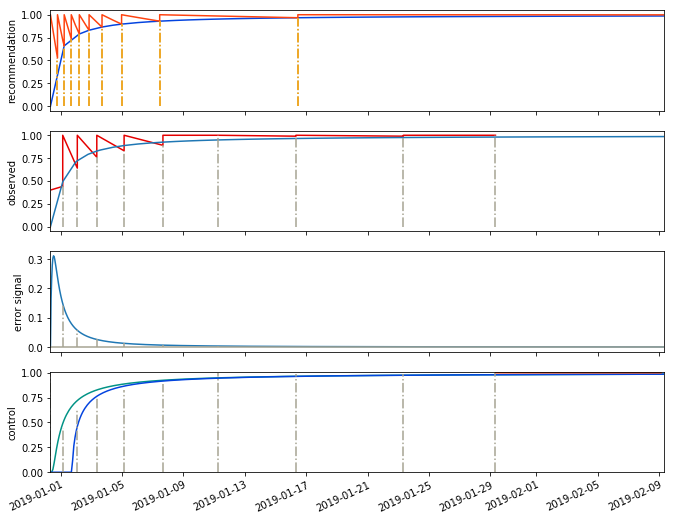

In [4]:
results = [ 
    [4.8,  7.33, 10.93, 16.00, 23.00, 29.00],
    [0.83, 0.89,  1.00,  0.99, 0.99,   1.00],
  ]

for dsi, r in zip(*results):
  days_since_training_epoch, result = dsi, r
  lt.learned(result=result, when=days_since_training_epoch)

print(lt.schedule())

# import pdb; pdb.set_trace()
hdl, _ = lt.plot_graphs()

lt.save_figure("./quickstart_control_after_ten_events.png")
lt.save_figure("./quickstart_control_after_ten_events.pdf")

In [5]:
for i, r in zip(*results):
    print(i)

4.8
7.33
10.93
16.0
23.0
29.0


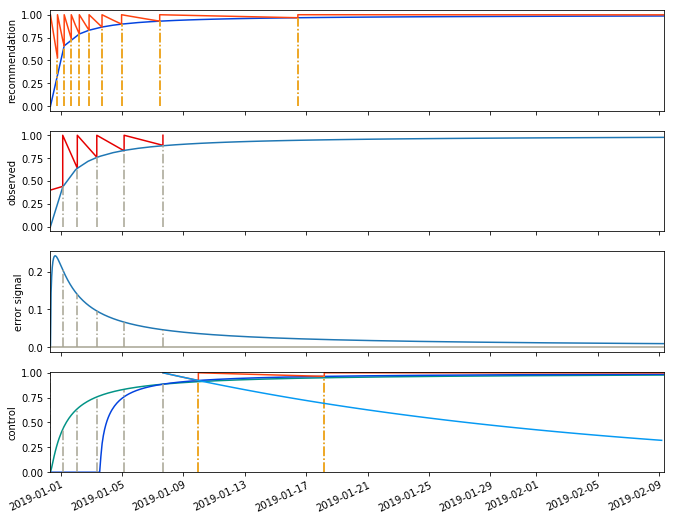

In [6]:
from datetime import datetime
from repetition import pp
from repetition import LearningTracker

# create a learning tracker
lt = LearningTracker(
    epoch=datetime.now(),
)

for d, r in zip( 
    [0,    0.8,  1.75, 3.02, 4.8,  7.33],
    [0.40, 0.44, 0.64, 0.76, 0.83, 0.89],
  ):
  # r: result
  # d: days since training epoch
  lt.learned(result=r, when=d)

# get a set of datetimes
useful_range_of_datetimes = lt.range_for(curve=1, range=10, day_step_size=0.5)

# make a results query using these datetimes
results = [lt.predict_result(moment, curve=1) for moment in useful_range_of_datetimes]
hdl, _ = lt.plot_graphs()

# get the handle for the last subplot so we can draw on it
control_plot = hdl.axarr[-1]
control_plot.plot(useful_range_of_datetimes, results, color='xkcd:azure')

lt.save_figure("./quickstart_control_after_five_events_and_query.png")
lt.save_figure("./quickstart_control_after_five_events_and_query.pdf")
lt.save_figure("./quickstart_control_after_five_events_and_query.svg")



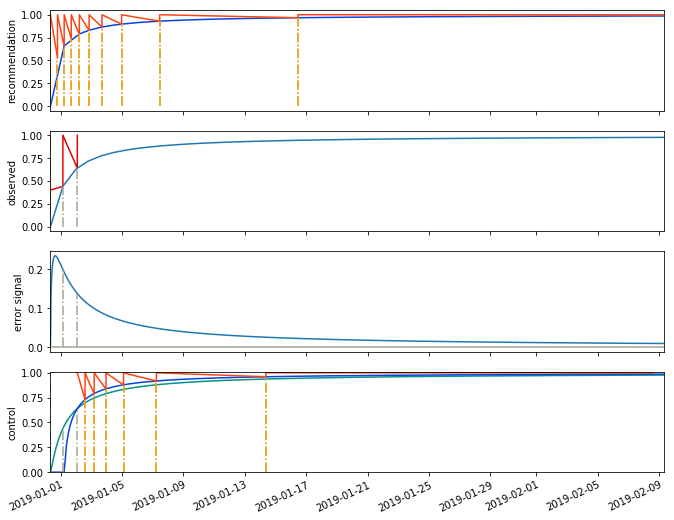

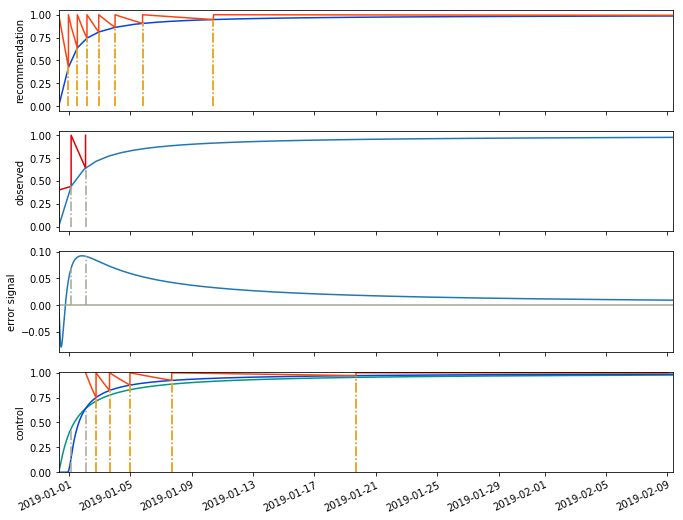

In [7]:
from datetime import datetime
from repetition import LearningTracker

day_offset_from_epoch_and_results = [ 
    [0,    0.81, 1.75, 3.02, 4.8,  8.33, 10.93, 16.00, 23.00, 29.00],
    [0.40, 0.44, 0.64, 0.84, 0.83, 0.89,  1.00,  0.99, 0.99,   1.00],
]

# create a learning tracker with arbitrary default paramters
lt_arbitrary = LearningTracker(
  epoch=datetime.now(),
)

# plot the third lesson so we can take a lot at the differences between
# some made up model and a model based on some previous feedback
lesson_to_graph = 3

# mimic a full training session
for index, (d, r) in enumerate(zip(*day_offset_from_epoch_and_results)):
  # r: result
  # d: days since training epoch
  lt_arbitrary.learned(result=r, when=d)

  # plot the lesson we want to graph
  if index is lesson_to_graph - 1:
    hdl, _ = lt_arbitrary.plot_graphs()
    for ext in ['png', 'pdf', 'svg']:
      lt_arbitrary.save_figure("./quickstart_arbitrary.{}".format(ext))
    
# to get the discovered parameter from a previous training session,
# pre-pend 'discovered' in front of the parameter name,
# and call this word like a function
lt_better_fit = LearningTracker(
  epoch=datetime.now(),
  plasticity_root=lt_arbitrary.discovered_plasticity_root(),
  plasticity_denominator_offset=lt_arbitrary.discovered_plasticity_denominator_offset(),
  fdecay0=lt_arbitrary.discovered_fdecay0(),
  fdecaytau=lt_arbitrary.discovered_fdecaytau()
)

for index, (d, r) in enumerate(zip(*day_offset_from_epoch_and_results)):
  # r: result
  # d: days since training epoch
  lt_better_fit.learned(result=r, when=d)

  # plot the lesson we want to graph
  if index is lesson_to_graph - 1:
    lt_better_fit.plot_graphs()
    for ext in ['png', 'pdf', 'svg']:
      lt_better_fit.save_figure("./quickstart_better_fit.{}".format(ext))

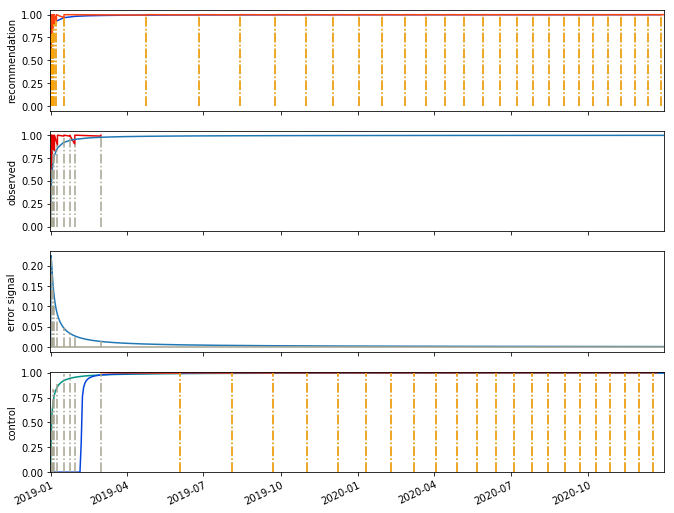

In [9]:
from datetime import datetime
from repetition import pp
from repetition import LearningTracker
start_time = datetime.now()

# track for 2 years
range_in_days = 365*2

lt = LearningTracker(
  epoch=start_time,
  range=range_in_days,
  long_term_clamp=0.00005,  # default
)

# the idea is mastered over two months
day_offset_from_epoch_and_results = [ 
  [0,    0.81, 1.75, 3.02, 4.8,  8.33, 16.00, 23.00, 29.00, 60],
  [0.40, 0.44, 0.64, 0.84, 0.83, 0.89,  0.99, 0.99,   0.90, 0.99],
]

for d, r in zip(*day_offset_from_epoch_and_results):
  # r: result
  # d: days since training epoch
  lt.learned(result=r, when=d)

hdl, _ = lt.plot_graphs()
lt.save_figure("./quickstart_long_term.svg")
lt.save_figure("./quickstart_long_term.pdf")
